In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


# The zip object packs each pair of lats and lngs having the same index in their 
# respective array into a tuple

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | dwarahat
Processing Record 2 of Set 12 | vila velha
Processing Record 3 of Set 12 | port alfred
Processing Record 4 of Set 12 | dauphin
Processing Record 5 of Set 12 | avarua
Processing Record 6 of Set 12 | barrow
Processing Record 7 of Set 12 | torbay
Processing Record 8 of Set 12 | provideniya
Processing Record 9 of Set 12 | kosh-agach
Processing Record 10 of Set 12 | mataura
Processing Record 11 of Set 12 | hilo
Processing Record 12 of Set 12 | new norfolk
Processing Record 13 of Set 12 | ribeira grande
Processing Record 14 of Set 12 | jacareacanga
Processing Record 15 of Set 12 | hermanus
Processing Record 16 of Set 12 | guerrero negro
Processing Record 17 of Set 12 | puerto ayora
Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | kapaa
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of

Processing Record 30 of Set 15 | muli
Processing Record 31 of Set 15 | bud
Processing Record 32 of Set 15 | novopokrovskaya
Processing Record 33 of Set 15 | tasiilaq
Processing Record 34 of Set 15 | butaritari
Processing Record 35 of Set 15 | upernavik
Processing Record 36 of Set 15 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 15 | sinop
Processing Record 38 of Set 15 | lompoc
Processing Record 39 of Set 15 | hervey bay
Processing Record 40 of Set 15 | severo-kurilsk
Processing Record 41 of Set 15 | comodoro rivadavia
Processing Record 42 of Set 15 | souillac
Processing Record 43 of Set 15 | portland
Processing Record 44 of Set 15 | reus
Processing Record 45 of Set 15 | constitucion
Processing Record 46 of Set 15 | lavrentiya
Processing Record 47 of Set 15 | nalut
Processing Record 48 of Set 15 | codrington
Processing Record 49 of Set 15 | ajaccio
Processing Record 50 of Set 15 | nome
Processing Record 1 of Set 16 | berlevag
Processing Record 2 of Set 16 | monrovi

Processing Record 18 of Set 19 | labutta
City not found. Skipping...
Processing Record 19 of Set 19 | podyuga
Processing Record 20 of Set 19 | koroni
Processing Record 21 of Set 19 | henties bay
Processing Record 22 of Set 19 | serebryanyy bor
Processing Record 23 of Set 19 | vardo
Processing Record 24 of Set 19 | lucea
Processing Record 25 of Set 19 | yirol
City not found. Skipping...
Processing Record 26 of Set 19 | egvekinot
Processing Record 27 of Set 19 | beloha
Processing Record 28 of Set 19 | cibinong
Processing Record 29 of Set 19 | arteaga
Processing Record 30 of Set 19 | lewistown
Processing Record 31 of Set 19 | rascani
City not found. Skipping...
Processing Record 32 of Set 19 | north bend
Processing Record 33 of Set 19 | puerto narino
Processing Record 34 of Set 19 | manama
Processing Record 35 of Set 19 | ulladulla
Processing Record 36 of Set 19 | tabuk
Processing Record 37 of Set 19 | warrnambool
Processing Record 38 of Set 19 | oussouye
Processing Record 39 of Set 19 | 

Processing Record 5 of Set 23 | sayabec
City not found. Skipping...
Processing Record 6 of Set 23 | denpasar
Processing Record 7 of Set 23 | caconda
Processing Record 8 of Set 23 | gobabis
Processing Record 9 of Set 23 | dunedin
Processing Record 10 of Set 23 | strezhevoy
Processing Record 11 of Set 23 | santa cruz
Processing Record 12 of Set 23 | sawakin
Processing Record 13 of Set 23 | kombissiri
Processing Record 14 of Set 23 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 23 | coihueco
Processing Record 16 of Set 23 | bobonong
City not found. Skipping...
Processing Record 17 of Set 23 | the valley
Processing Record 18 of Set 23 | san roque
Processing Record 19 of Set 23 | luganville
Processing Record 20 of Set 23 | valdivia
Processing Record 21 of Set 23 | matara
Processing Record 22 of Set 23 | padang
Processing Record 23 of Set 23 | tyret pervaya
Processing Record 24 of Set 23 | ketchikan
Processing Record 25 of Set 23 | la ronge
Processing Record 26 of Set 2

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dwarahat,29.7833,79.4333,68.59,92,95,1.52,IN,2021-08-07 22:07:24
1,Vila Velha,-20.3297,-40.2925,66.15,94,90,6.91,BR,2021-08-07 22:06:28
2,Port Alfred,-33.5906,26.8910,59.04,84,71,12.68,ZA,2021-08-07 22:07:25
3,Dauphin,51.1494,-100.0502,93.60,19,10,12.01,CA,2021-08-07 22:07:25
4,Avarua,-21.2078,-159.7750,78.85,69,20,8.05,CK,2021-08-07 22:05:26
5,Barrow,71.2906,-156.7887,39.22,73,75,9.22,US,2021-08-07 22:05:59
6,Torbay,47.6666,-52.7314,72.57,81,95,4.00,CA,2021-08-07 22:03:20
7,Provideniya,64.3833,-173.3000,44.71,81,100,6.20,RU,2021-08-07 22:07:26
8,Kosh-Agach,50.0000,88.6667,44.92,78,17,2.80,RU,2021-08-07 22:04:26
9,Mataura,-46.1927,168.8643,36.48,94,100,1.21,NZ,2021-08-07 22:07:26


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
print ("Hello World")

Hello World


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628374419.520242

In [13]:
today = time.strftime("%x")
today

'08/07/21'

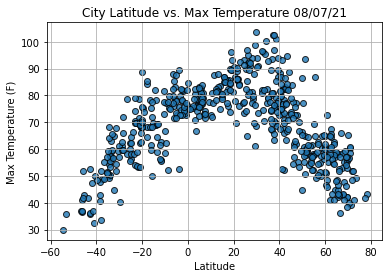

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

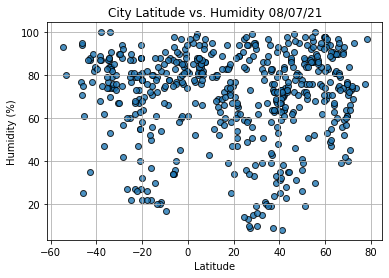

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

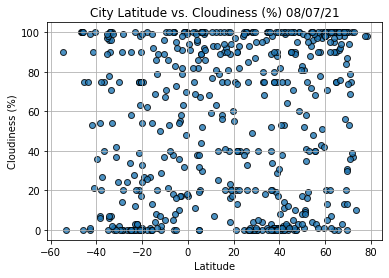

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

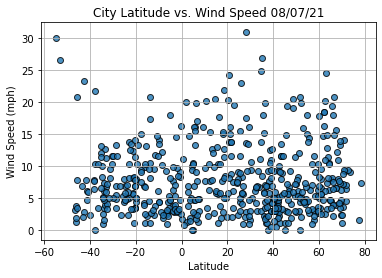

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [56]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(str(title))
    plt.show()

In [57]:
index13 = city_data_df.loc[13]
index13

City                 Jacareacanga
Country                        BR
Date          2021-08-07 22:07:28
Lat                       -6.2222
Lng                      -57.7528
Max Temp                    85.21
Humidity                       34
Cloudiness                      0
Wind Speed                   2.44
Name: 13, dtype: object

In [58]:
# city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

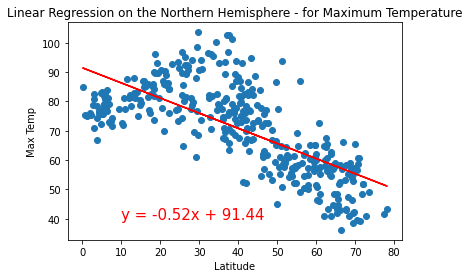

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere - for Maximum Temperature', 'Max Temp',(10,40))

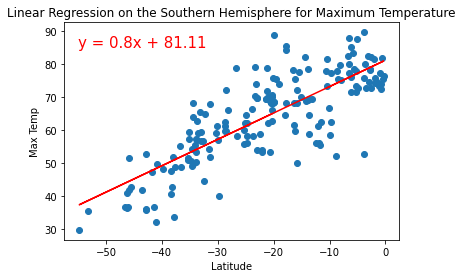

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,85))

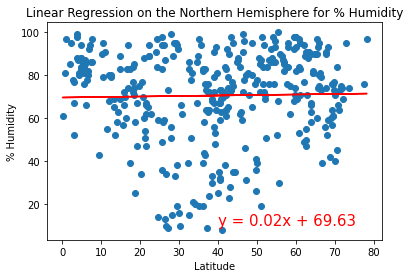

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

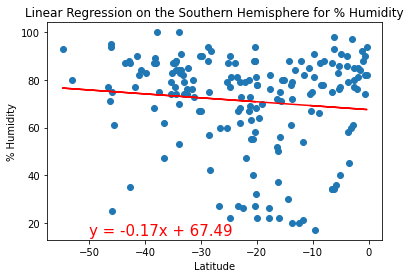

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

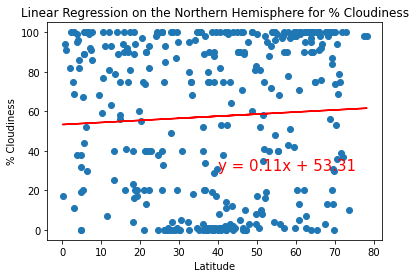

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))

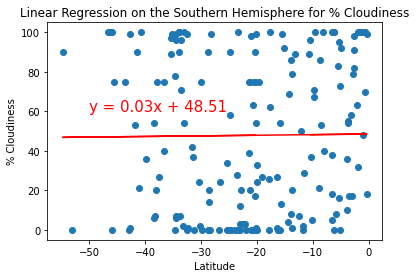

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

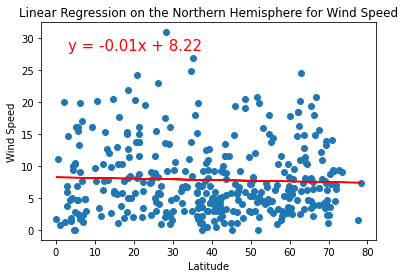

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(3,28))

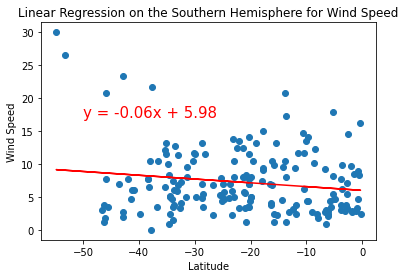

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,17))